In [56]:
# Importing libraries/ packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from math import sqrt

from sklearn.metrics import accuracy_score

In [57]:
# Reading dataset
df = pd.read_csv(r"train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# Checking shape 
df.shape

(891, 12)

# Data Preprocessing

In [59]:
# Removing PassengerId, Name and Ticket Columns from the analysis \
# as they do not add any learning ability to the problem statement
df = df.drop(['PassengerId','Name','Ticket'], axis = 1)
df.shape

(891, 9)

In [60]:
# Encoding Categorical variable as numbers
label_encoder = preprocessing.LabelEncoder()

df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,2
1,1,1,0,38.0,1,0,71.2833,C85,0
2,1,3,0,26.0,0,0,7.9250,NaN,2
3,1,1,0,35.0,1,0,53.1000,C123,2
4,0,3,1,35.0,0,0,8.0500,NaN,2


In [61]:
# Check DataType 
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked      int64
dtype: object

In [62]:
# Convert datatype of Categorical columns 
df.Pclass = df.Pclass.astype('object')
df.SibSp = df.SibSp.astype('object')
df.Parch = df.Parch.astype('object')
df.dtypes

Survived      int64
Pclass       object
Sex           int64
Age         float64
SibSp        object
Parch        object
Fare        float64
Cabin        object
Embarked      int64
dtype: object

In [63]:
# Check presence of NULLs
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [64]:
# Check number of categories in 'Cabin' column
df.Cabin.nunique()

147

In [65]:
# Percentage of nulls in Cabin and Age column
print(np.round((len(df[df.Cabin.isnull()])/ len(df) * 100),2),"  % of records in CABIN Column are NULL")
print(np.round((len(df[df.Age.isnull()])/ len(df) * 100),2)," % of records in AGE Column are NULL")
print(np.round((len(df[df.Embarked.isnull()])/ len(df) * 100),2)," % of records in EMBARKED Column are NULL")

77.1   % of records in CABIN Column are NULL
19.87  % of records in AGE Column are NULL
0.0  % of records in EMBARKED Column are NULL


In [66]:
# CABIN Column
# Due to nearly 77% of values in CABIN column being NULL and the column having 147 unique categories, \
# it would not be possible to impute/treat null values. 
# Hence 'CABIN' column is removed from the analysis
df = df.drop('Cabin', axis = 1)

# AGE Column
# Impute NULL values in AGE Column using Mean Age
df['Age']=df['Age'].fillna(df['Age'].mean())

# EMBARKED Column
# Since only 0.22% of the records are NULL, NULL records are removed from the analysis
df = df[df.Embarked.notnull()]

0    549
1    342
Name: Survived, dtype: int64


Text(0, 0.5, 'Number of Records')

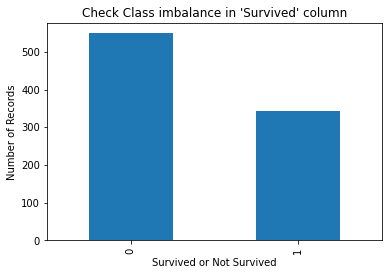

In [67]:
# Check Class Imbalance
print(df.Survived.value_counts())
ax = df.Survived.value_counts().plot(kind='bar', title='Check Class imbalance in \'Survived\' column')
ax.set_xlabel("Survived or Not Survived")
ax.set_ylabel("Number of Records")

In [68]:
# Since not much imbalance exists between 0 (Not-Survived) and 1 (Survived)
# Hence proceeding ahead

In [69]:
# Scaling to bring numerical column values to same scale using MinMaxScaler
df_numerical = df[['Age','Fare']]
scaler = MinMaxScaler()
scaled_df_numerical = scaler.fit_transform(df_numerical)
df_numerical = pd.DataFrame(np.round(scaled_df_numerical,2), columns=['Age','Fare'])
df['Age'] = df_numerical['Age']
df['Fare'] = df_numerical['Fare']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.27,1,0,0.01,2
1,1,1,0,0.47,1,0,0.14,0
2,1,3,0,0.32,0,0,0.02,2
3,1,1,0,0.43,1,0,0.10,2
4,0,3,1,0.43,0,0,0.02,2


In [70]:
# Split Train and Test dataset for validating Machine Learning model
y = df.Survived
x = df.drop('Survived', axis=1)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((712, 7), (179, 7), (712,), (179,))

# Model Building

# KNN

In [71]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(r1, r2):
    
    distance = 0
    for i in range(len(r1)-1):
        distance += (r1[i] - r2[i])**2
    distance = distance**(1/2)
    return distance

In [72]:
# KNN Model 
def knn_predict(train_x, test_x, k):

    prediction_y = []
    train_x = train_x.iloc[:,:-1].values
    test_x = test_x.iloc[:,:-1].values

    for test_pt in test_x:
        distances = []

        for train_pt in train_x:
#             For a selected test point, find Euclidean distance between that test point and train point
#             print(test_pt, train_pt)
            distance = euclidean_distance(test_pt, train_pt)
            distances.append(distance)
        
        df_distances = pd.DataFrame(distances, columns=['distances'], index=train_y.index)
        
        # Sort distances, consider k closest points
        df_nearest_neighbors = df_distances.sort_values(by=['distances'], axis=0)[:k]

        # Counter to track the labels of k closest neighbors
        counter = Counter(train_y[df_nearest_neighbors.index])

        # Fetch most common label/class of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        prediction_y.append(prediction)
        
    return prediction_y

In [73]:
# Predictions
prediction_y = knn_predict(train_x, test_x, k=5)

# Accuracy
print(accuracy_score(test_y, prediction_y))

0.770949720670391


In [74]:
# Choosing value of k 
range_k = range(1, 10)
accuracy_scores = []
for i in range_k:
    prediction_y = knn_predict(train_x, test_x, k=i)
    accuracy_scores.append(accuracy_score(test_y, prediction_y))
    
df_k_selection = pd.DataFrame(range_k, columns=['k_value'])
df_k_selection['Accuracy_Score'] = accuracy_scores
df_k_selection

,k_value,Accuracy_Score
0,1,0.625698
1,2,0.625698
2,3,0.698324
3,4,0.698324
4,5,0.770950
5,6,0.765363
6,7,0.793296
7,8,0.793296
8,9,0.793296


In [75]:
# from above results, optimal value of k is 7 (beyond which accuracy saturates to a constant)
optimal_k = 7

In [76]:
# Final Model
prediction_y = knn_predict(train_x, test_x, k=optimal_k)

# Accuracy
print(accuracy_score(test_y, prediction_y))

0.7932960893854749


In [77]:
# Run model on test data
# Reading dataset
test_df = pd.read_csv(r"test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
# Data Preprocessing
# Removing PassengerId, Name and Ticket Columns from the analysis 
test_df = test_df.drop(['PassengerId','Name','Ticket'], axis = 1)

# Label encoding
test_df['Sex']= label_encoder.fit_transform(test_df['Sex'])
test_df['Embarked']= label_encoder.fit_transform(test_df['Embarked'])

# Convert datatype of Categorical columns 
test_df.Pclass = test_df.Pclass.astype('object')
test_df.SibSp = test_df.SibSp.astype('object')
test_df.Parch = test_df.Parch.astype('object')

# Dropping Cabin column
test_df = test_df.drop('Cabin', axis = 1)

# AGE Column
# Impute NULL values in AGE Column using Mean Age
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())

# EMBARKED Column
# Remove NULL
test_df = test_df[test_df.Embarked.notnull()]

# Scaling
df_numerical = test_df[['Age','Fare']]
scaler = MinMaxScaler()
scaled_df_numerical = scaler.fit_transform(df_numerical)
df_numerical = pd.DataFrame(np.round(scaled_df_numerical,2), columns=['Age','Fare'])
test_df['Age'] = df_numerical['Age']
test_df['Fare'] = df_numerical['Fare']
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.45,0,0,0.02,1
1,3,0,0.62,1,0,0.01,2
2,2,1,0.82,0,0,0.02,1
3,3,1,0.35,0,0,0.02,2
4,3,0,0.29,1,1,0.02,2


In [79]:
# Predictions on Test data
prediction_y = knn_predict(train_x, test_df, k=optimal_k)

In [80]:
# Reading test_y
test_y = pd.read_csv(r"gender_submission.csv")
test_y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
# Comparing test results using accuracy score
test_y = test_y.Survived
print(accuracy_score(test_y, prediction_y))

0.9114832535885168
